In [1]:
import pandas as pd
data = pd.read_csv("file:///home/maburto/kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [2]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


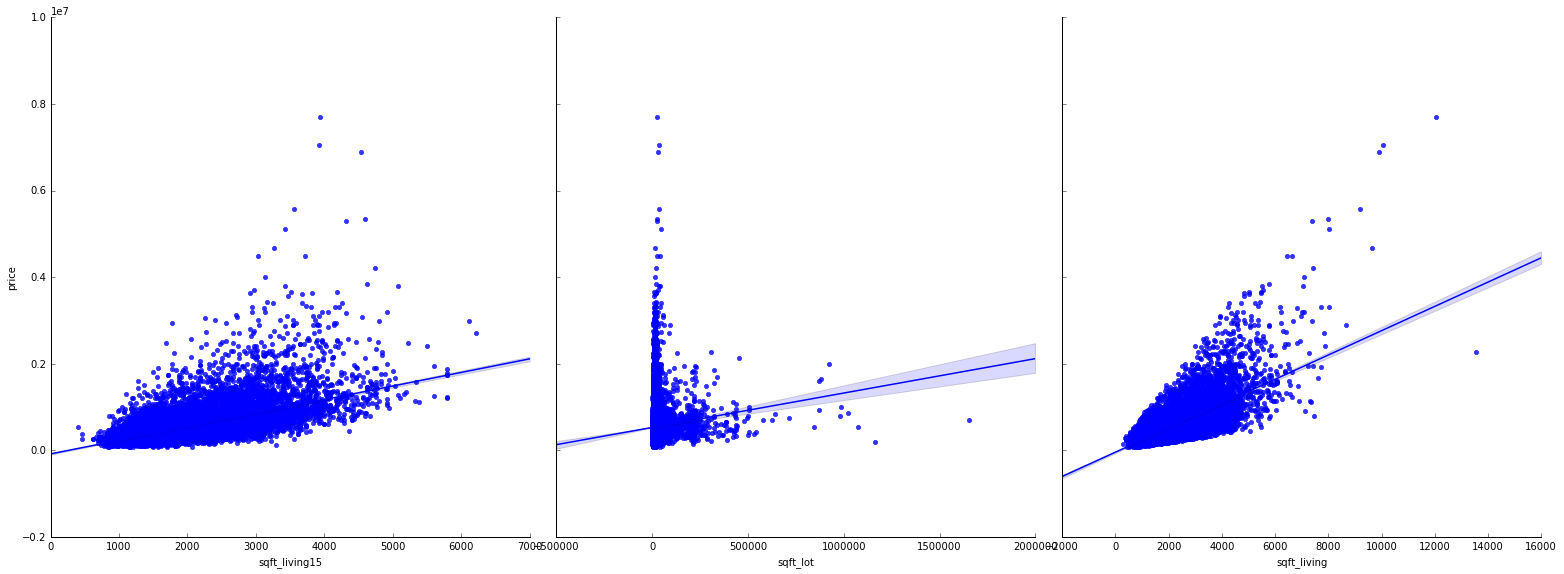

In [3]:
import seaborn as sns

# Permitir que los graficos aparezcan en las celdas
%matplotlib inline
sns.pairplot(data, x_vars=['sqft_living15','sqft_lot','sqft_living'], y_vars='price', size=8, aspect=0.9, kind='reg')

In [5]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import svm
#Separar conjunto de datos en Matriz de Características y Respuesta
# Crear una lista de Python con los nombre de las caracteristicas
feature_cols = ['sqft_living15','sqft_living']

# Use esta lista para seleccionar el subconjunto del DataFrame original
X = data[feature_cols]
y=data["price"]

#conjunto entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
clf = svm.SVR()
clf.fit(X_train, y_train) 
y_pred1 = clf.predict(X_test)

scaler = StandardScaler()  
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 


linreg=LinearRegression() 
linreg.fit(X_train,y_train)
y_pred2=linreg.predict(X_test)

#ANN.fit(X_train,y_train)
#y_pred1=ANN.predict(X_test)



print "Error SVR: ", mean_squared_error(y_test,y_pred1)
print "MAPE svr", np.mean(np.abs((y_test - y_pred1) / y_test)) * 100 #metrics.mean_absolute_error(y_test, y_pred1)
print "Error Regresion Lineal: ",mean_squared_error(y_test,y_pred2)
print "MAPE regresor", np.mean(np.abs((y_test - y_pred2) / y_test)) * 100

Error SVR:  182385350388.0
MAPE svr 42.7306690672
Error Regresion Lineal:  84889918760.2
MAPE regresor 35.3104068449


In [6]:


from sklearn.model_selection import KFold

resultados_linreg=[]
resultados_mapemlp =[] 
resultados_MLP=[]
resultados_mapelin = []
X=np.array(X)
linreg=LinearRegression()
kf = KFold(n_splits=5)
for k, (train, test) in enumerate(kf.split(X, y)):
    X_train, X_test = X[train,:], X[test,:]
    y_train, y_test = y[train], y[test]
    
    
   
    
    scaler = StandardScaler()  
    scaler.fit(X_train)  
    X_train = scaler.transform(X_train)  
    X_test = scaler.transform(X_test)
    
    linreg.fit(X_train,y_train)
    y_pred2=linreg.predict(X_test)
    
    
    clf.fit(X_train,y_train)
    y_pred1=clf.predict(X_test)
    
    resultados_linreg.append(mean_squared_error(y_test,y_pred2))
    resultados_MLP.append(mean_squared_error(y_test,y_pred1))
    #mape print "MAPE svr", np.mean(np.abs((y_test - y_pred1) / y_test)) * 100
    resultados_mapelin.append(np.mean(np.abs((y_test - y_pred2) / y_test)))
    resultados_mapemlp.append(np.mean(np.abs((y_test - y_pred1) / y_test)))
    
print "Resultado MLP: ",resultados_MLP
print "Promedio MLP: ",np.mean(resultados_MLP)
print "Resultado LinReg: ",resultados_linreg
print "Promedio LinReg: ",np.mean(resultados_linreg)

/opt/cloudera/parcels/Anaconda-4.2.0/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Resultado MLP:  [158363047623.84091, 145783125851.56256, 121566468342.25937, 133770990603.63605, 151184057359.25977]
Promedio MLP:  142133537956.0
Resultado LinReg:  [75680444208.976929, 69793239363.191742, 59315172140.023018, 62099027489.267632, 71902781978.681702]
Promedio LinReg:  67758133036.0


In [7]:
from scipy import stats
t_stat, p_val =  stats.ttest_ind(resultados_mapelin,resultados_mapemlp)
print(t_stat)
print(p_val)

-6.24935774893
0.000245880752488
